In [1]:
import os, sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))
import numpy as np
import pandas as pd
from ppi_py.datasets import load_dataset
from ppi_py import ppi_quantile_ci, classical_quantile_ci
from tqdm import tqdm
from utils import *

# Import the gene expression data set

In [2]:
dataset_folder = './data/'
data = load_dataset(dataset_folder, 'gene_expression')
Y = data['Y']
Yhat = data['Yhat']

# Problem setup

In [3]:
alpha = 0.05
n_max = Y.shape[0] # Total number of labeled examples
ns = np.linspace(100,2000,5).astype(int) # Test for different numbers of labeled examples
num_trials = 5

# Reported result (official outcome)
true_quantile_q25 = np.quantile(Y, 0.25)
true_quantile_q50 = np.quantile(Y, 0.5)
true_quantile_q75 = np.quantile(Y, 0.75)

q = 0.5 # Target problem is inference on the median

# Construct intervals

In [4]:
# Run prediction-powered inference and classical inference for many values of n
results = []
for i in tqdm(range(ns.shape[0])):
    for j in range(num_trials):
        # Prediction-Powered Inference
        n = ns[i]
        rand_idx = np.random.permutation(n_max)
        _Yhat = Yhat[rand_idx[:n]]
        _Y = Y[rand_idx[:n]]
        _Yhat_unlabeled = Yhat[n:]
        
        ppi_ci = ppi_quantile_ci(_Y, _Yhat, _Yhat_unlabeled, q, alpha=alpha)
        
        # Classical interval
        classical_ci = classical_quantile_ci(_Y, q, alpha=alpha)
        
        # Append results
        results += [pd.DataFrame([{
            "method": "PPI",
            "n": n,
            "lower": ppi_ci[0],
            "upper": ppi_ci[1],
            "trial": j,
        }])]
        results += [pd.DataFrame([{
            "method": "Classical",
            "n": n,
            "lower": classical_ci[0],
            "upper": classical_ci[1],
            "trial": j,
        }])]
        
# Imputed CI
imputed_ci = classical_quantile_ci(Yhat, q, alpha=alpha)
results += [pd.DataFrame([{
    "method": "Imputation",
    "n": np.nan,
    "lower": imputed_ci[0],
    "upper": imputed_ci[1],
    "trial": 0,
}])]

df = pd.concat(results,axis=0,ignore_index=True)
df['width'] = df['upper'] - df['lower']

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:27<00:00,  5.56s/it]


# Plot results

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


ValueError: x and y must be the same size

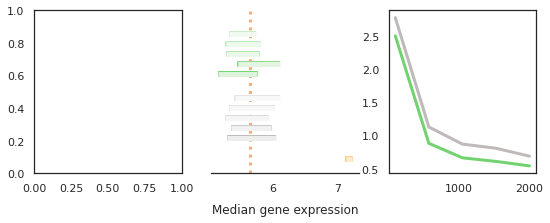

In [8]:
%load_ext autoreload
%autoreload 2
make_plots(df, './plots/gene_expression.pdf', intervals_xlabel="Median gene expression", true_theta=true_quantile_q50)

,method,n,lower,upper,trial,width
0,PPI,100.0,4.342552,7.369524,0,3.026972
1,Classical,100.0,5.177286,8.124809,0,2.947523
2,PPI,100.0,3.743107,7.187191,1,3.444085
3,Classical,100.0,3.741632,6.882378,1,3.140746
4,PPI,100.0,4.177619,6.748108,2,2.570489
5,Classical,100.0,4.174762,6.777587,2,2.602826
6,PPI,100.0,4.281017,6.662673,3,2.381656
7,Classical,100.0,4.859530,7.892143,3,3.032613
8,PPI,100.0,4.941006,6.020384,4,1.079378
9,Classical,100.0,4.204669,6.349469,4,2.144800
